# 30 Day Map Challenge

## Day 15 - Food/Drink

Plan: Produce a contour map of the Champagne region of France

In [98]:
import rasterio
import matplotlib.pyplot as plt
import os
import numpy as np

Setting the Working Directory

In [99]:
os.getcwd()
os.chdir("c:\\Users\\vicks\\OneDrive\\Data Science (not uni)\\Portfolio\\30 Day Map Challenge\\30 Day Map Challenge Data\\FoodDrink")

Importing the [data](https://www.ncei.noaa.gov/maps/grid-extract/)

_Coordinates used for the Champagne region: N - 49.45, S - 47.91, W - 3.25, E - 4.87 based off [this map](https://vineyards.com/wine-map/france/champagne)_

_Shapefile used to clip the raster was manually drawn in QGIS and can be found [here]()_

In [100]:
file = rasterio.open("Champagne Region Clip.tif")

In [101]:
champ = file.read()

In [102]:
print(champ.shape)

(2, 351, 391)


Initial inspection of the raster file

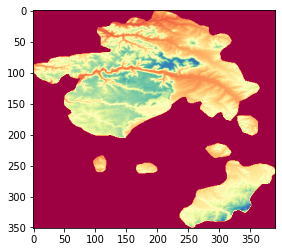

In [104]:
plt.imshow(champ[0], cmap='Spectral')
plt.show()

Creating a champagne inspired colourmap

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
champreg_colormap = LinearSegmentedColormap.from_list('italy', ['#CC983B', '#EFC15F', '#FEFFED', '#8D7B2D', '#524925'])

viewing the colourmap adjusted plot

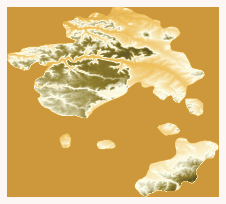

In [ ]:
from matplotlib import colors

fig = plt.figure(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)
ax = plt.axes()
plt.imshow(champ[0], cmap=champreg_colormap)
ax.axis('off')
plt.show()

Creating a hillshade plot to overlay onto the map - producing the 3D effect

In [ ]:
import earthpy.spatial as es

hillshade = es.hillshade(champ[0], azimuth=270, altitude=1)

Building the final plot

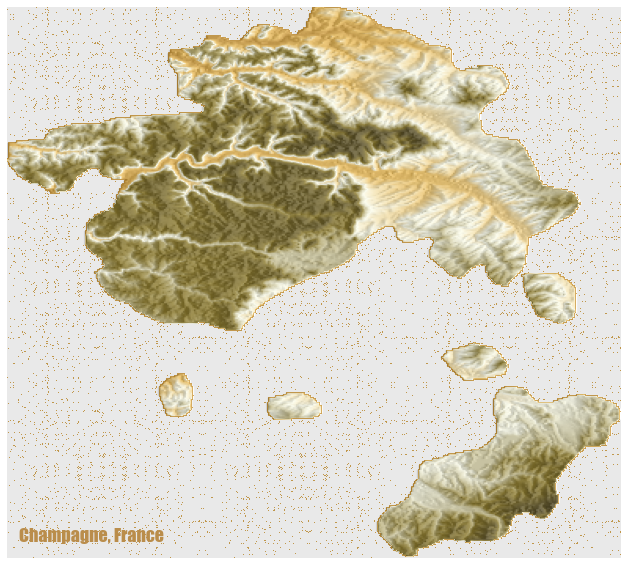

In [106]:
fig, ax = plt.subplots(figsize=(11, 11))
i = plt.imshow(champ[0], cmap=champreg_colormap, norm=colors.LogNorm())
ax.imshow(hillshade, cmap="Greys", alpha=0.2)
ax.axis('off')

txt = ax.text(0.02, 0.03, "Champagne, France",
              size=18,
              color='#BA8D4B',
              transform = ax.transAxes,
              fontfamily='fantasy')

plt.show()